In [1]:
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from ddgclib._complex import Complex
from data_levelset_geometric_shapes.extract_and_process_interface_points import read_data, \
    extract_and_save_unique_intersection_points, plot_intersection_points, plot_unique_intersections,\
    plot_and_save_levelset_points


In [2]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_coarse/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_coarse")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [3]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  128
Total number of intersections  :  504
Total number of levelset points:  128


In [4]:
corners_and_intersections

[{'Corners': array([[0.3125, 0.375 , 0.4375],
         [0.375 , 0.375 , 0.4375],
         [0.375 , 0.4375, 0.4375],
         [0.3125, 0.4375, 0.4375],
         [0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.49514239]]),
  'Levelset': array([[0.37466445, 0.42575942, 0.47516802]])},
 {'Corners': array([[0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ],
         [0.3125, 0.375 , 0.5625],
         [0.375 , 0.375 , 0.5625],
         [0.375 , 0.4375, 0.5625],
         [0.3125, 0.4375, 0.5625]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.50485761]]),
  'Levelset': array([[0.37466445

In [5]:
len(corners_and_intersections)

128

In [6]:
corners_and_intersections[0].keys()

dict_keys(['Corners', 'Intersections', 'Levelset'])

In [7]:
for c in corners_and_intersections:
    if len(c['Intersections']) > 6:
        print('AHHHH!')

In [8]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    for xi in c['Intersections']:
        #HC.V(xi)
        X.append(xi)
        
X = np.array(X)

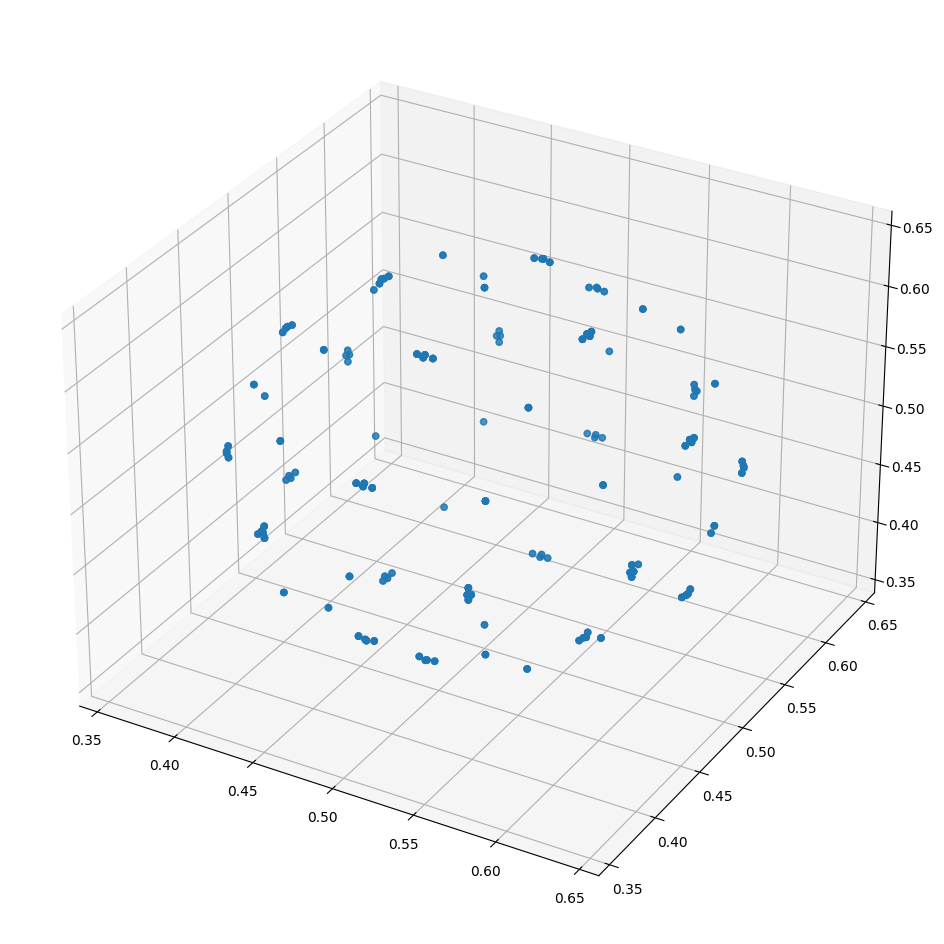

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [10]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            vi.connect(vj)
        X.append(xi)
        
X = np.array(X)

In [11]:
HC.V.size()

126

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2831: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

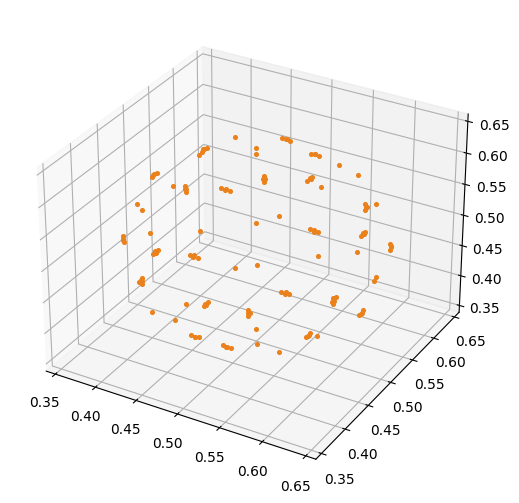

In [12]:
HC.plot_complex()

In [13]:
cdist = 1e-6
HC.V.merge_all(cdist=cdist)

In [14]:
HC.V.size()

126

# Pseudo-triangulation algorithm


In [36]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    vc = HC.V[tuple(cm)]
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        vi.connect(vc)
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            vi.connect(vj)
        X.append(xi)
        
X = np.array(X)

<IPython.core.display.Javascript object>


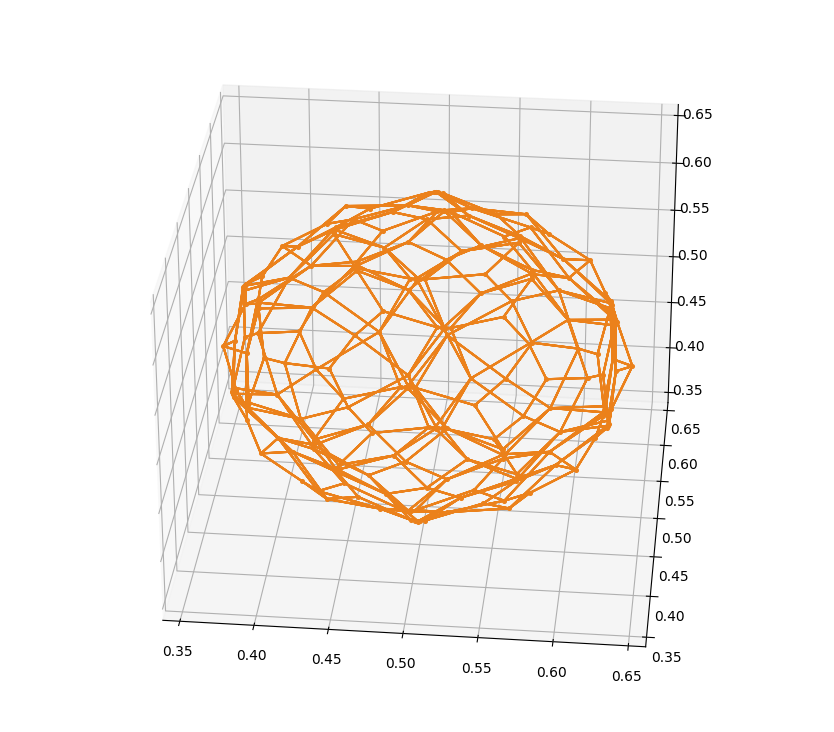

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [37]:
%matplotlib notebook
HC.plot_complex()

In [38]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    vc = HC.V[tuple(cm)]
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        vi.connect(vc)
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            vi.connect(vj)
        X.append(xi)
        
X = np.array(X)



In [41]:
import copy

hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

<IPython.core.display.Javascript object>


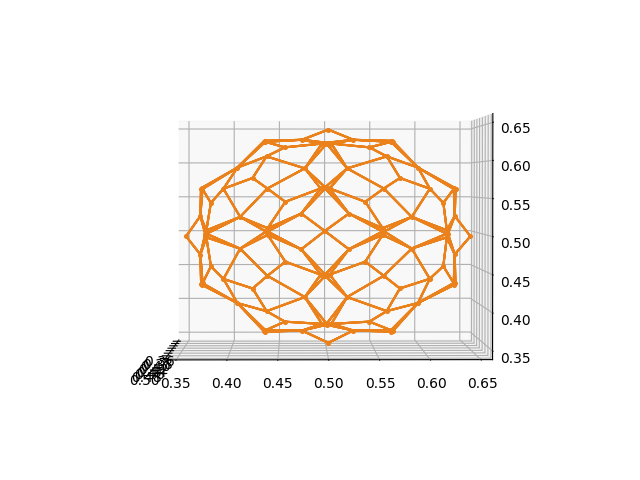

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [42]:
%matplotlib notebook
HC.plot_complex()